In [1]:
# Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('./data/marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# Transform and clean data 
def clean_data(df):
    df.columns=[m.lower().replace(' ', '_') for m in df.columns]
    df=df.drop(columns=['unnamed:_0', 'state'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    return df

In [5]:
data = clean_data(data)

In [6]:
# Show DataFrame info
data.info

<bound method DataFrame.info of       customer  customer_lifetime_value response  coverage  \
2      LZ68649             14947.917300       No     Basic   
3      XL78013             22332.439460      Yes  Extended   
10     HG93801              5154.764074       No  Extended   
13     KR82385              5454.587929       No     Basic   
16     FH51383              5326.677654       No     Basic   
...        ...                      ...      ...       ...   
10902  PP30874              3579.023825       No  Extended   
10903  SU71163              2771.663013       No     Basic   
10904  QI63521             19228.463620       No     Basic   
10906  KX53892              5259.444853       No     Basic   
10908  WA60547             11971.977650       No   Premium   

                  education effective_to_date employmentstatus gender  income  \
2                  Bachelor        2011-02-10         Employed      M   22139   
3                   College        2011-01-11         Employe

In [7]:
# Describe DataFrame
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
data.describe(include='all')

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
count,4543,4543.000000,4543,4543,4543,4543,4543,4543,4543.000000,4543,4543,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543,4543,4543,4543,4543.000000,4543,4543,4543
unique,4543,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3,1
top,LZ68649,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,A
freq,1,NaN,3902,2759,1374,105,2831,2326,NaN,2844,2665,NaN,NaN,NaN,NaN,NaN,3390,1730,1849,1751,NaN,2277,3187,4543
first,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8033.714059,NaN,NaN,NaN,NaN,NaN,NaN,37453.033238,NaN,NaN,93.773278,15.111820,48.153863,0.386309,2.980189,NaN,NaN,NaN,NaN,436.477525,NaN,NaN,NaN
std,NaN,6959.529443,NaN,NaN,NaN,NaN,NaN,NaN,30257.399536,NaN,NaN,35.093661,10.157925,28.146904,0.907553,2.390362,NaN,NaN,NaN,NaN,295.026990,NaN,NaN,NaN
min,NaN,1904.000852,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,NaN
25%,NaN,4039.089902,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,69.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,265.686145,NaN,NaN,NaN


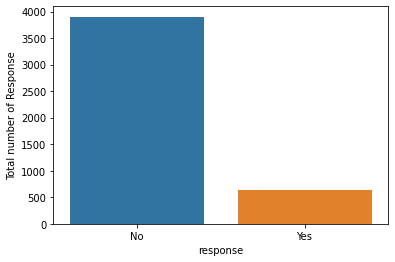

In [9]:
# Show a plot of the total number of responses
sns.countplot('response', data=data)
plt.ylabel('Total number of Response')
plt.show()

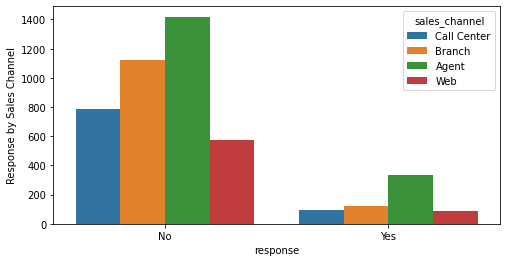

In [10]:
# Show a plot of the response rate by the sales channel
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=data)
plt.ylabel('Response by Sales Channel')
plt.show()

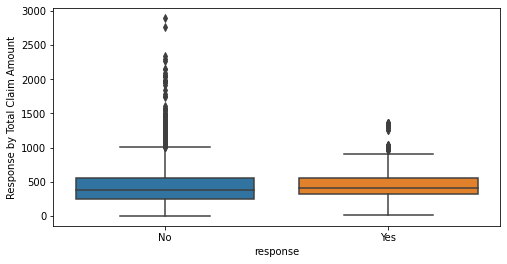

In [17]:
# Show a plot of the response rate by the total claim amount
plt.figure(figsize=(8,4))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response by Total Claim Amount')
plt.show()

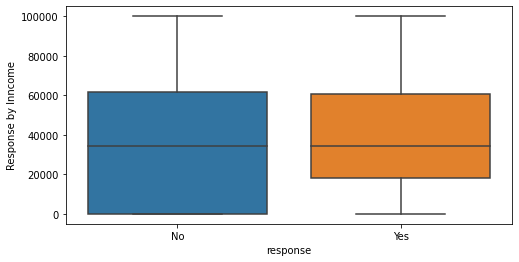

In [16]:
# Show a plot of the response rate by income
plt.figure(figsize=(8,4))
sns.boxplot(y='income' , x='response', data=data)
plt.ylabel('Response by Inncome')
plt.show()